<a href="https://colab.research.google.com/github/LaiTriMinh/project/blob/main/tien_viet_nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
%cd /content/gdrive/MyDrive/tien

/content/gdrive/MyDrive/tien


In [34]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [35]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/tien/train',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 387 images belonging to 6 classes.


In [36]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/tien/test',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 66 images belonging to 6 classes.


In [38]:
training_set.class_indices

{'100K': 0, '10K': 1, '200K': 2, '20K': 3, '500K': 4, '50K': 5}

In [39]:
test_set.class_indices

{'100K': 0, '10K': 1, '200K': 2, '20K': 3, '500K': 4, '50K': 5}

In [40]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [41]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])


Epoch 1/100
13/13 [==============================] - 68s 5s/step - loss: 3.1230 - accuracy: 0.1421 - val_loss: 1.8087 - val_accuracy: 0.1515
Epoch 2/100
13/13 [==============================] - 66s 5s/step - loss: 1.7912 - accuracy: 0.1654 - val_loss: 1.7910 - val_accuracy: 0.1364
Epoch 3/100
13/13 [==============================] - 66s 5s/step - loss: 1.7554 - accuracy: 0.2558 - val_loss: 1.9190 - val_accuracy: 0.1970
Epoch 4/100
13/13 [==============================] - 66s 5s/step - loss: 1.6456 - accuracy: 0.3385 - val_loss: 1.7066 - val_accuracy: 0.2727
Epoch 5/100
13/13 [==============================] - 66s 5s/step - loss: 1.5956 - accuracy: 0.3023 - val_loss: 1.7842 - val_accuracy: 0.2424
Epoch 6/100
13/13 [==============================] - 66s 5s/step - loss: 1.4941 - accuracy: 0.3359 - val_loss: 1.6916 - val_accuracy: 0.2727
Epoch 7/100
13/13 [==============================] - 66s 5s/step - loss: 1.3765 - accuracy: 0.4057 - val_loss: 1.7265 - val_accuracy: 0.3939
Epoch 8/100
1

In [49]:
model.save('tien.h5')

In [50]:
model_tien = load_model('tien.h5')

In [51]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.16737137734889984
Train Accuracy 0.9483203887939453


1/1 [==============================] - 0s 148ms/step
Đây là tờ: 100K


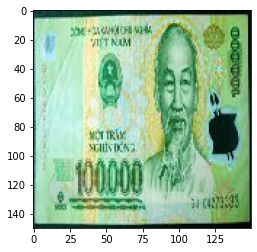

In [53]:
img = load_img('/content/100k.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_tien.predict(img)
class_tien=['100K','10K','200K','20K','500K','50K']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là tờ:", class_tien[a])